# Global Developer Insights: Understanding the Open Source Community and Career Trends

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections as cl
from datetime import datetime

I will try to find out the answer to the below questions:
- What is the level of participation in open source among individuals?
- How much money do the Developers get across the globe?
- How satisfied are developers with their jobs globally?
- What is the educational background of developers?
- What factors are prioritized by people when selecting a job offer?
- How does age affect work hours and code review hours for developers?
- What are the challenges faced by developers in their work?
- Which social media sites are commonly used by developers?
- Among developers, what is the most popular operating system?
- What is the reason behind developers frequently updating their resumes?
- What programming languages have developers worked with, and which ones do they want to use in the future?
- What are the programming languages that the Developers had worked with and what languages do they want to use in future?
- What are the Database Servers that the Developers use to while coding and what Database Servers they want to use in future?
- Which type of work location is preferred by the Developers?

In [2]:
curr_dir=os.getcwd()
rel_file_path='Data\\dev_survey.csv'
full_file_path = os.path.join(curr_dir, rel_file_path)
df = pd.read_csv(full_file_path)

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

#### For this analysis, we need only a few columns.

In [5]:
targetColumns = ["MainBranch", "OpenSourcer", "Country", "EdLevel", "LastInt", "JobFactors", "WorkChallenge", "SOVisitFreq", "SOVisitTo", "SOTimeSaved", "SOHowMuchTime", "CareerSat", "ResumeUpdate", "ConvertedComp", "WorkWeekHrs", "CodeRevHrs", "WorkLoc", "LanguageWorkedWith", "LanguageDesireNextYear", "DatabaseWorkedWith", "DatabaseDesireNextYear", "PlatformWorkedWith", "PlatformDesireNextYear", "WebFrameWorkedWith", "WebFrameDesireNextYear", "OpSys", "SocialMedia", "Age", "Gender"]

In [6]:
df = df[targetColumns]

In [7]:
df.shape

(88883, 29)

Statistical Analysis of `numeric` data type columns 

In [8]:
df.describe()

,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,1.271107e+05,42.127197,5.084308,30.336699
std,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,1.000000,0.000000,1.000000
25%,2.577750e+04,40.000000,2.000000,24.000000
50%,5.728700e+04,40.000000,4.000000,29.000000
75%,1.000000e+05,44.750000,6.000000,35.000000
max,2.000000e+06,4850.000000,99.000000,99.000000


Statistical Analysis of `object` data type columns 

In [9]:
temp = df.describe(include  = "object")

In [10]:
temp[["EdLevel", "LastInt", "JobFactors", "WorkChallenge", "SOVisitFreq", "SOVisitTo", "SOTimeSaved", "SOHowMuchTime"]]

,EdLevel,LastInt,JobFactors,WorkChallenge,SOVisitFreq,SOVisitTo,SOTimeSaved,SOHowMuchTime
count,86390,67155,79371,68141,88263,88086,86344,68378
unique,9,63,175,129,6,63,5,4
top,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Interview with people in peer roles;Interview ...,"Languages, frameworks, and other technologies ...",Being tasked with non-development work;Distrac...,Daily or almost daily,Find answers to specific questions,Stack Overflow was much faster,11-30 minutes
freq,39134,12383,4992,2318,26827,33842,45330,27872


In [11]:
#columns having a small set of unique values
catColumns = ["MainBranch", "OpenSourcer", "EdLevel", "CareerSat", "SOVisitFreq", "SOTimeSaved", "SOHowMuchTime", "ResumeUpdate", "WorkLoc", "OpSys", "SocialMedia", "Gender"]

for column in catColumns:
    print("Unique values in", column,"are :")
    print(df[column].value_counts())
    print("")

Unique values in MainBranch are :
I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

Unique values in OpenSourcer are :
Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

Unique values in EdLevel are :
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                         

With an overall overview of the data, it is clear that there are various incompleteness with the data and they are as follows.

### Assessing The Data

When considering memory usage, a string stored as a category type will generally take up less space than a string stored as an np.object type, assuming the string has a limited number of unique values.

In a category type, the unique values of the string are stored in a separate array, and the original column contains integers that map to the unique values. This means that the memory usage of the category type is proportional to the number of unique values, not the number of rows in the dataframe. If the string has a limited number of unique values, this can lead to significant memory savings compared to storing the string as an np.object type.

In contrast, an np.object type stores each individual string as a separate object, with no ability to map to a smaller set of unique values. This means that the memory usage of an np.object type is proportional to the number of rows in the dataframe, as each row requires a separate object to store the string.

However, if the string has a large number of unique values, then storing it as a category type may actually use more memory than storing it as an np.object type. This is because the category type requires additional storage to store the mapping between integers and unique values, and if there are many unique values, this mapping can become quite large.

In summary, if a string has a limited number of unique values, storing it as a category type can lead to significant memory savings compared to storing it as an np.object type. However, if the string has a large number of unique values, then storing it as a category type may actually use more memory than storing it as an np.object type.

Type Conversion
- MainBranch to Category type
- OpenSourcer to Category type as 'Yes' or 'No'.
- ResumeUpdate to Category type.
- CareerSat to category type as this contain only 5 type of string.
- WorkLoc to Category type as 'Office' or 'Home'.
- OpSys to Category type.
- Age to Integer type as age is always a whole number.
- Gender to Category type as 'Male' or 'Female'.

Quantity of incompleteness which needs to be sorted else it will hamper the analysis
- MainBranch: We will remove all the empty data as Non-Developer.
- Country: We remove the entire row without Country column.
- WorkWeekHrs: We will replace the empty entry with mean of that column.
- Gender" We will take the empty entry as Transgender.

## Data Wrangling

So now we know the datatypes of the columns and hence now we will be converting them to their required data tyes. 

#### Categorizing a participant based on the answer submitted in MainBranch

Here, we will replace empty values with "Student". 

In [12]:
df["MainBranch"].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [13]:
toReplace = ["I am a developer by profession", 
             "I am a student who is learning to code",
             "I am not primarily a developer, but I write code sometimes as part of my work",
             "I code primarily as a hobby", 
             "I used to be a developer by profession, but no longer am",
                np.nan]

targetValues = ["Developer",
              "Student",
              "Partial_Developer",
              "Hobbyist",
              "Ex_Developer",
               "Student"]

df["MainBranch"].replace(toReplace, targetValues, inplace = True)

In [14]:
df["MainBranch"] = df["MainBranch"].astype('category')

#### Categorizing a participant as a contributor to open source i.e. 'Yes' or 'No'

In [15]:
df["OpenSourcer"].value_counts()

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

In [16]:
df["OpenSourcer"].replace({"Once a month or more often": "Yes", 
                             "Less than once a month but more than once per year": "Yes",
                            "Less than once per year": "No",
                            "Never": "No"}, inplace = True)

In [17]:
df["OpenSourcer"] = df["OpenSourcer"].astype("category")

#### Categorizing EdLevel (Education Level)

In [18]:
df["EdLevel"].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [19]:
df["EdLevel"] = df["EdLevel"].astype("category")

#### Categorizing SOVisitFreq (Frequency of visit to Stackoverflow)

In [20]:
df["SOVisitFreq"].value_counts()

Daily or almost daily                                 26827
Multiple times per day                                26767
A few times per week                                  19990
A few times per month or weekly                       11162
Less than once per month or monthly                    2957
I have never visited Stack Overflow (before today)      560
Name: SOVisitFreq, dtype: int64

In [21]:
df["SOVisitFreq"] = df["SOVisitFreq"].astype("category")

#### Categorizing SOTimeSaved (How fast is Stackoverflow when compared to other sources)

In [22]:
df["SOTimeSaved"].value_counts()

Stack Overflow was much faster            45330
Stack Overflow was slightly faster        21342
They were about the same                  17029
The other resource was slightly faster     1670
The other resource was much faster          973
Name: SOTimeSaved, dtype: int64

In [23]:
df["SOTimeSaved"] = df["SOTimeSaved"].astype("category")

#### Categorizing SOHowMuchTime (How much time did Stackoverflow save)

In [24]:
df["SOHowMuchTime"].value_counts()

11-30 minutes    27872
0-10 minutes     15497
31-60 minutes    13636
60+ minutes      11373
Name: SOHowMuchTime, dtype: int64

In [25]:
df["SOHowMuchTime"] = df["SOHowMuchTime"].astype("category")

#### Categorizing CareerSat

In [26]:
df["CareerSat"].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [27]:
df["CareerSat"] = df["CareerSat"].astype("category")

#### Categorizing ResumeUpdate

In [28]:
df["ResumeUpdate"].value_counts()

I was preparing for a job search                                                33309
My job status changed (promotion, new job, etc.)                                13546
Something else changed (education, award, media, etc.)                          11986
I heard about a job opportunity (from a recruiter, online job posting, etc.)    11327
I had a negative experience or interaction at work                               6272
Re-entry into the workforce                                                      1437
Name: ResumeUpdate, dtype: int64

In [29]:
df["ResumeUpdate"] = df["ResumeUpdate"].astype("category")

#### Categorizing WorkLoc

Here, we replace empty values with `"Other"`. We could replace it by the most frequent data i.e. `"Office"`. But we shouldn't do that because the column `"WorkLoc"` contains over 20% empty values. If we replace `NaN` by `"Office"`, it would significantly change the distribution.

In [30]:
emptyValCount = df["WorkLoc"].isnull().sum()
total = df["WorkLoc"].size

print("The percentage of empty values in \"WorkLoc\" column is", round((emptyValCount/total)*100,2))

The percentage of empty values in "WorkLoc" column is 21.18


In [31]:
df["WorkLoc"].value_counts()

Office                                            40592
Home                                              23278
Other place, such as a coworking space or cafe     6185
Name: WorkLoc, dtype: int64

In [32]:
df["WorkLoc"].replace({"Other place, such as a coworking space or cafe": "Other", np.nan : "Other"}, inplace = True)

In [33]:
df["WorkLoc"] = df["WorkLoc"].astype("category")

#### Categorizing OpSys

In [34]:
df["OpSys"].value_counts()

Windows        41714
MacOS          23541
Linux-based    22472
BSD              124
Name: OpSys, dtype: int64

In [35]:
df["OpSys"] = df["OpSys"].astype("category")

#### Converting Age to Integer type

In [36]:
count = 0

for i in df.index:
    try:
        df.at[i,"Age"]= int(df.at[i,"Age"])
    except:
        count += 1

#### For Country, We don't have other option as to remove the entire row without Country column.

In [37]:
mostFreqCountry = df["Country"].value_counts().idxmax()
df["Country"].replace(np.nan, mostFreqCountry, inplace = True)

## Exploratory Data Analysis

In [38]:
def columnUniqueValuesCount(dff, columnName):
    allValues = []
    n = len(dff[columnName])
    count = 0

    for i in range(0,n):
        try:
            allValues.extend(dff.at[i,columnName].split(";"))
        except:
            count += 1
        
    dffCount = pd.DataFrame(allValues, columns = [columnName])
    
    return dffCount

### Participants who contribute to opensource

Text(0.5, 1.0, 'Contribution to Open Source')

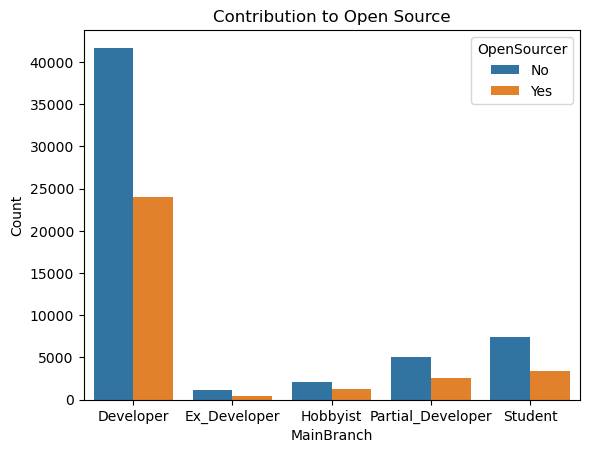

In [39]:
devc = df.groupby("MainBranch")["OpenSourcer"].value_counts()
devc = devc.to_frame("Count")
devc = devc.reset_index()
devc.rename(columns = {"level_1": "OpenSourcer"}, inplace = True)
plot = sns.barplot(x="MainBranch", y="Count", hue = "OpenSourcer", data=devc)
plot.set_title("Contribution to Open Source")

### Median and Average Salary of Top 20 countries

Text(0.5, 1.0, 'Median Income of top 20 countires')

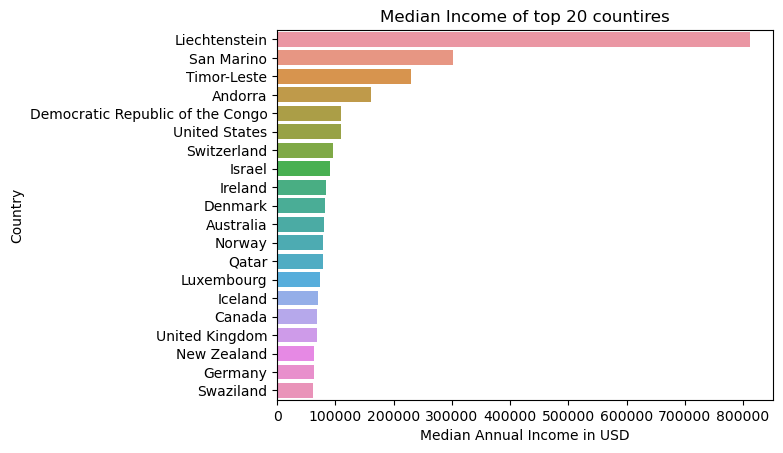

In [40]:
medianSalary = df.groupby("Country")["ConvertedComp"].median()
plotData1 = medianSalary.sort_values(ascending=False)[:20]
plotData = plotData1.reset_index()
plotData.rename(columns = {"ConvertedComp":"Median Annual Income in USD"},inplace = True)
plot1 = sns.barplot(y = "Country", x = "Median Annual Income in USD",data = plotData)
plot1.set_title("Median Income of top 20 countires")

Text(0.5, 1.0, 'Average Income of top 20 countires')

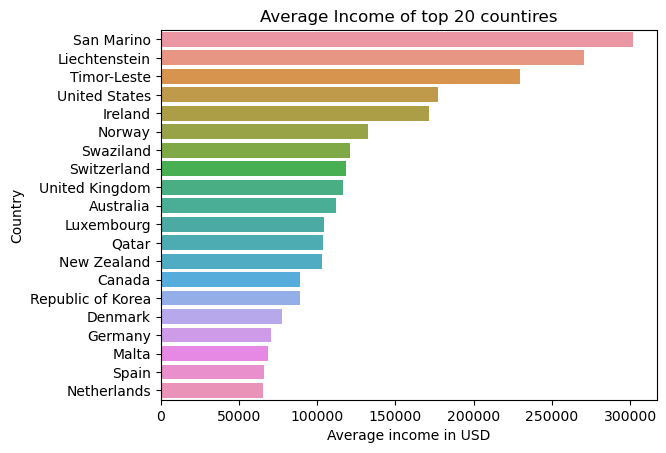

In [41]:
countryCount = df["Country"].value_counts()
totalSalary = df.groupby("Country")["ConvertedComp"].sum()
plotData2 = (totalSalary /countryCount).sort_values(ascending=False)[:20]
plotData = plotData2.reset_index()
plotData.rename(columns={0:'Average income in USD','index':'Country'},inplace=True)
plot2 = sns.barplot(y="Country",x="Average income in USD",data = plotData)
plot2.set_title("Average Income of top 20 countires")

### Checking the satisfaction level among developers

For this, we will take only `"Developer"` entries

Text(0.5, 1.0, 'Degree of satisfaction among developers')

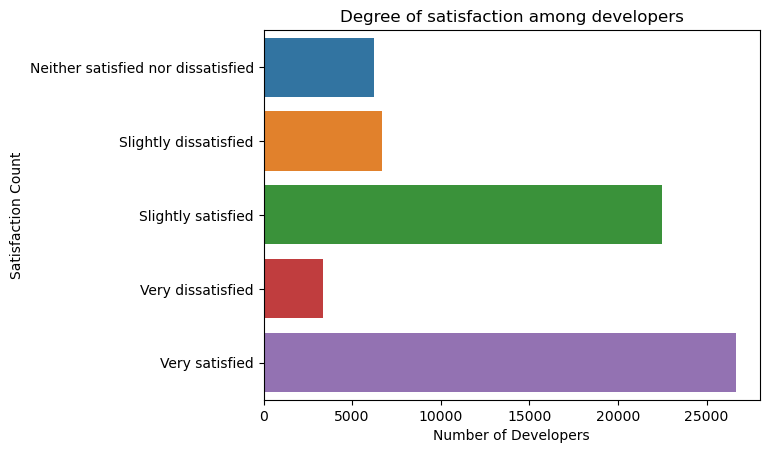

In [42]:
devData = df[df["MainBranch"]=="Developer"]
plotData = devData["CareerSat"].value_counts().reset_index()
plotData.rename(columns={"index":"Satisfaction Count", "CareerSat": "Number of Developers"}, inplace=True)
plot = sns.barplot(y="Satisfaction Count", x = "Number of Developers", data = plotData)
plot.set_title("Degree of satisfaction among developers")

### Checking the education level of developers

In [43]:
plotData = devData["EdLevel"].value_counts().reset_index()
plotData

,index,EdLevel
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",32582
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",15936
2,Some college/university study without earning ...,7376
3,"Secondary school (e.g. American high school, G...",3373
4,Associate degree,2157
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",1468
6,"Professional degree (JD, MD, etc.)",891
7,Primary/elementary school,331
8,I never completed any formal education,312


Text(0.5, 1.0, 'Education Level of Developers')

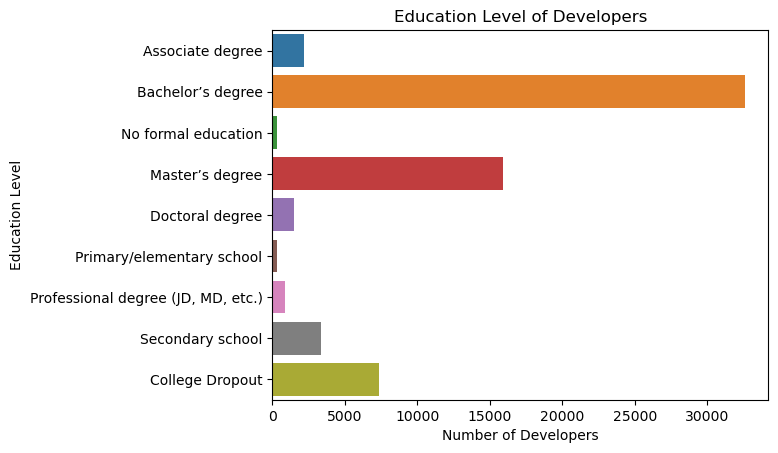

In [44]:
#Renaming columns
plotData.rename(columns = {"index" : "Education Level", "EdLevel" : "Number of Developers"},inplace=True)

#Replacing long names with their shorter version
newNames = {'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree',
            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree', 
            'I never completed any formal education': 'No formal education', 
            'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree', 
            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school', 
            'Some college/university study without earning a degree': 'College Dropout'}
plotData.replace(newNames, inplace = True)

plot = sns.barplot(data = plotData, x = "Number of Developers", y = "Education Level")
plot.set_title("Education Level of Developers")

### Factors that people prioritize while choosing a job offer

In [45]:
plotData = columnUniqueValuesCount(df, "JobFactors").value_counts().reset_index()

Text(0.5, 1.0, 'Factors prioritized while choosing a job offer')

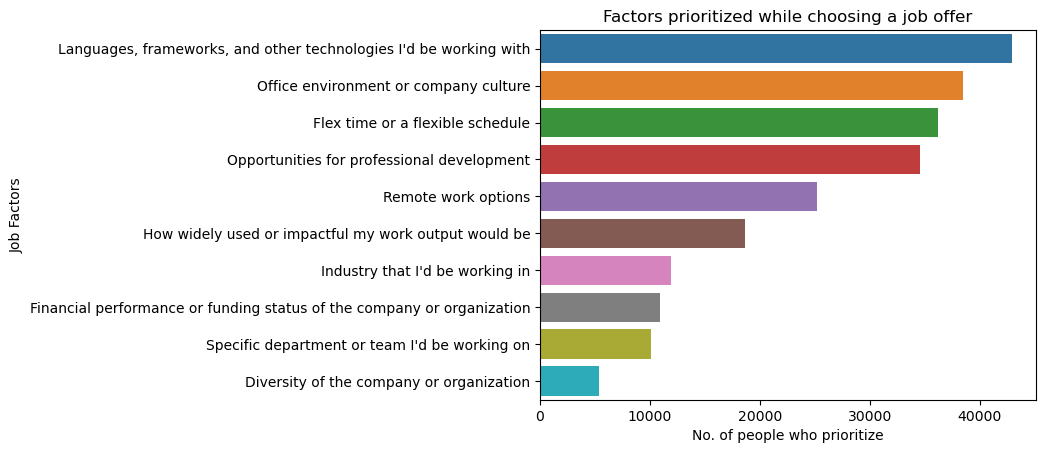

In [46]:
plotData.rename(columns = {"JobFactors" : "Job Factors", 0: "No. of people who prioritize"},inplace = True)

plot = sns.barplot(data = plotData, x = "No. of people who prioritize", y = "Job Factors")
plot.set_title("Factors prioritized while choosing a job offer")

### Work Challenege among developers

In [47]:
plotData = columnUniqueValuesCount(devData, "WorkChallenge").value_counts().reset_index()

Text(0.5, 1.0, 'Work Challenge among developers')

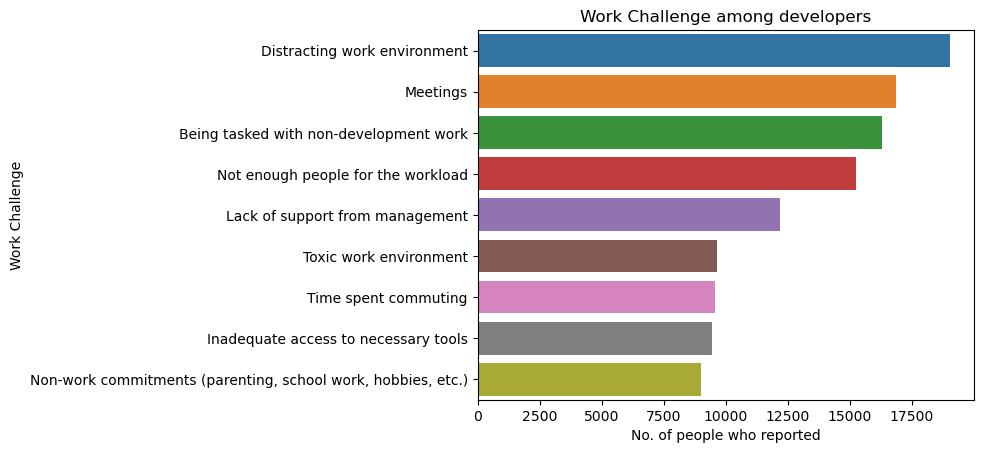

In [48]:
plotData.rename(columns = {"WorkChallenge" : "Work Challenge", 0: "No. of people who reported"},inplace = True)

plot = sns.barplot(data = plotData, x = "No. of people who reported", y = "Work Challenge")
plot.set_title("Work Challenge among developers")

### Checking the age distribution among developers

Text(0.5, 1.0, 'Developer Age Distribution')

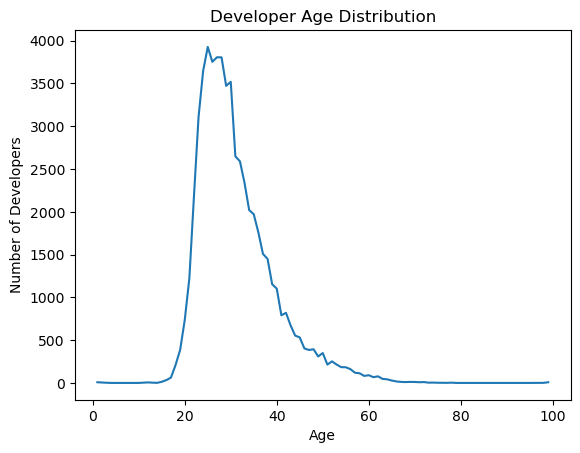

In [49]:
plotData = devData["Age"].value_counts().reset_index()
plotData.rename(columns = {"index":"Age", "Age":"Number of Developers"}, inplace = True)
plot = sns.lineplot(x = "Age", y = "Number of Developers", data = plotData)
plot.set_title("Developer Age Distribution")

In [50]:
df["Age"].describe()

count    79210.000000
mean        30.336359
std          9.178396
min          1.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

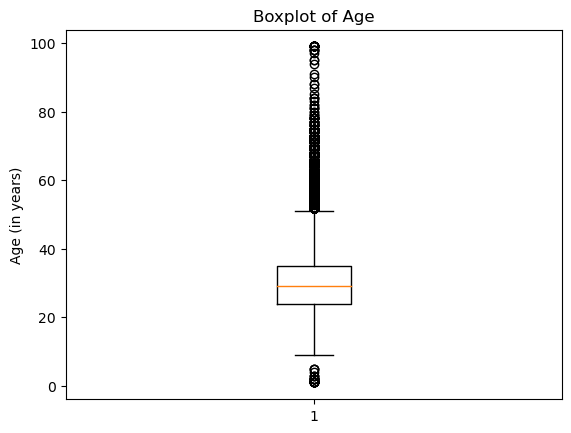

In [51]:
plt.boxplot(df["Age"].dropna())
plt.ylabel("Age (in years)")
plt.title("Boxplot of Age")
plt.show()

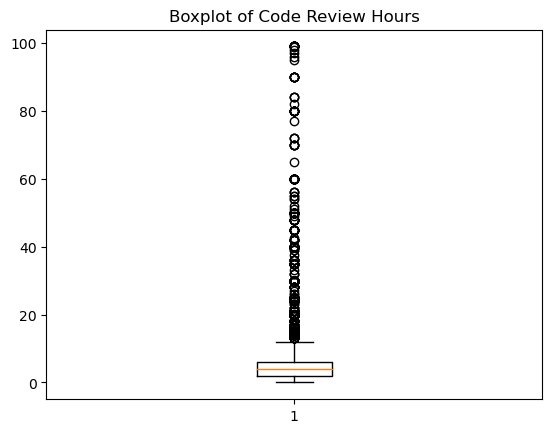

In [52]:
plt.boxplot(df["CodeRevHrs"].dropna())
plt.title("Boxplot of Code Review Hours")
plt.show()

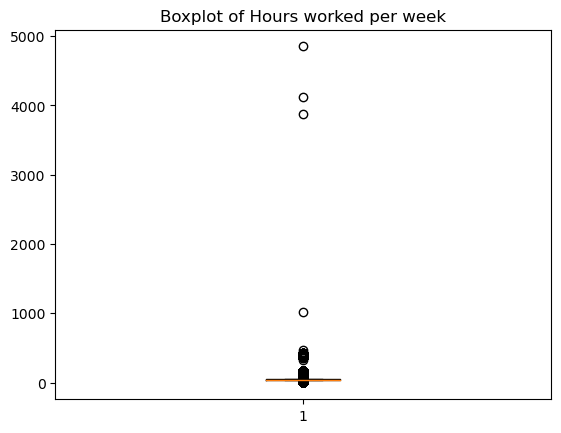

In [53]:
plt.boxplot(df["WorkWeekHrs"].dropna())
plt.title("Boxplot of Hours worked per week")
plt.show()

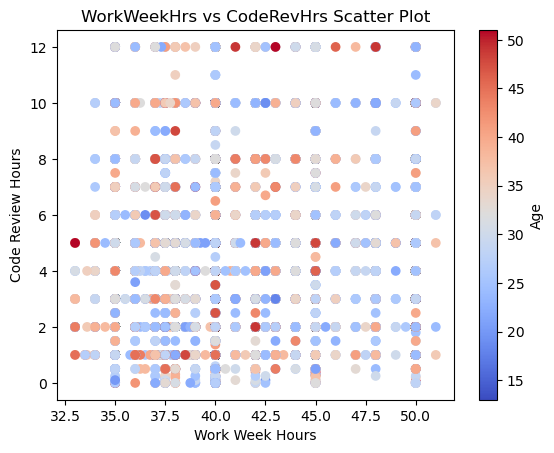

In [54]:
# Calculate the IQR for 'Age', 'CodeRevHrs' and 'WorkWeekHrs'
Q1_age = df["Age"].quantile(0.25)
Q3_age = df["Age"].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_workhrs = df["WorkWeekHrs"].quantile(0.25)
Q3_workhrs = df["WorkWeekHrs"].quantile(0.75)
IQR_workhrs = Q3_workhrs - Q1_workhrs

Q1_codehrs = df["CodeRevHrs"].quantile(0.25)
Q3_codehrs = df["CodeRevHrs"].quantile(0.75)
IQR_codehrs = Q3_codehrs - Q1_codehrs

# Remove the outlier points from the DataFrame
df = df[~((df["Age"] < (Q1_age - 1.5 * IQR_age)) | (df["Age"] > (Q3_age + 1.5 * IQR_age)))]
df = df[~((df["WorkWeekHrs"] < (Q1_workhrs - 1.5 * IQR_workhrs)) | (df["WorkWeekHrs"] > (Q3_workhrs + 1.5 * IQR_workhrs)))]
df = df[~((df["CodeRevHrs"] < (Q1_codehrs - 1.5 * IQR_codehrs)) | (df["CodeRevHrs"] > (Q3_codehrs + 1.5 * IQR_codehrs)))]

# Create the scatter plot
plt.scatter(df["WorkWeekHrs"], df["CodeRevHrs"], c=df["Age"], cmap="coolwarm")

# Add axis labels and a colorbar
plt.xlabel("Work Week Hours")
plt.ylabel("Code Review Hours")
plt.colorbar(label="Age")
plt.title('WorkWeekHrs vs CodeRevHrs Scatter Plot')

# Show the plot
plt.show()

### Social media sites used by developers

In [55]:
plotData = devData["SocialMedia"].value_counts().reset_index()
plotData

,index,SocialMedia
0,Reddit,11034
1,Facebook,10067
2,WhatsApp,9909
3,YouTube,9223
4,Twitter,9104
5,Instagram,4669
6,I don't use social media,4058
7,LinkedIn,3453
8,WeChat 微信,468
9,VK ВКонта́кте,427


We would run into Unicode character issues if we retain the Chinese characters in the names under `"index"`. So, we retain only their English part.

In [56]:
plotData.at[8,"index"] = "WeChat"
plotData.at[11,"index"] = "Weibo"
plotData.at[12,"index"] = "Youku Tudou"
plotData

,index,SocialMedia
0,Reddit,11034
1,Facebook,10067
2,WhatsApp,9909
3,YouTube,9223
4,Twitter,9104
5,Instagram,4669
6,I don't use social media,4058
7,LinkedIn,3453
8,WeChat,468
9,VK ВКонта́кте,427


Text(0.5, 1.0, 'Social Media Platform used by developers')

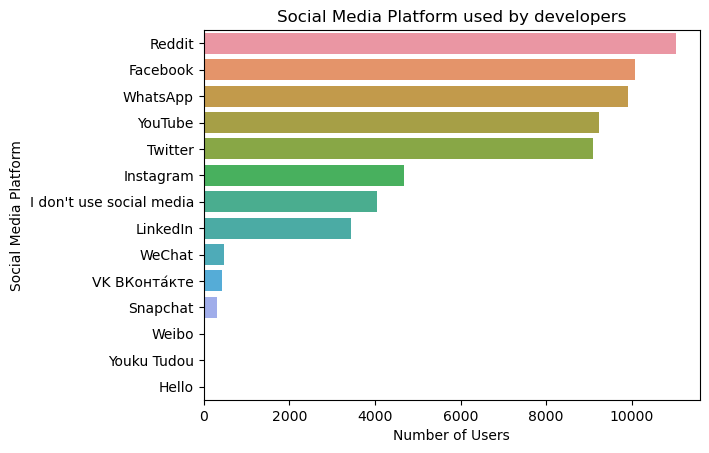

In [57]:
plotData.rename(columns = {"index" : "Social Media Platform", "SocialMedia" : "Number of Users"},inplace=True)
plot = sns.barplot(data = plotData, x='Number of Users',y='Social Media Platform')
plot.set_title("Social Media Platform used by developers")

### Popularity of various Operating System among Developers

In [58]:
devData["OpSys"].value_counts()

Windows        29235
MacOS          19614
Linux-based    16245
BSD               64
Name: OpSys, dtype: int64

As the count of `"BSD"` is too less as compared to other OS, it's not visible in the below bar plot

Text(0.5, 1.0, 'OS Popularity among Developers')

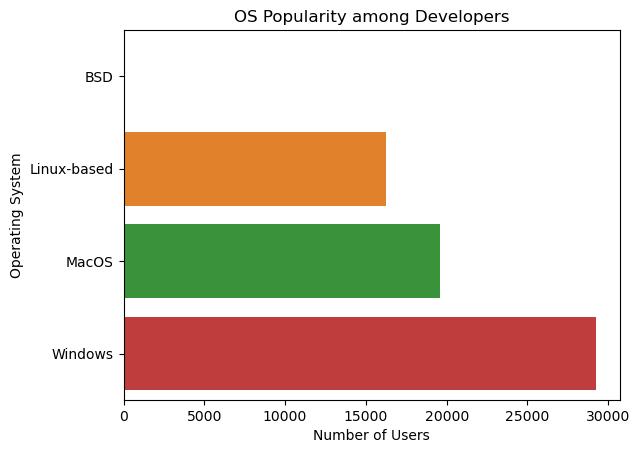

In [59]:
plotData = devData["OpSys"].value_counts().reset_index()
plotData.rename(columns={"index" : "Operating System", "OpSys": "Number of Users"},inplace=True)
plot = sns.barplot(x = "Number of Users" , y = "Operating System", data = plotData)
plot.set_title("OS Popularity among Developers")

### Reason behind RESUME update

Text(0.5, 1.0, 'RESUME update reasons')

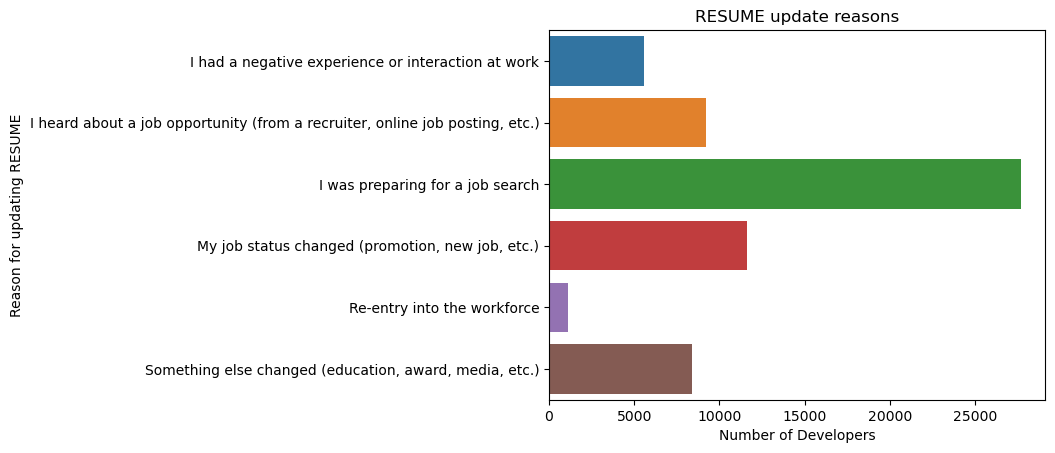

In [60]:
plotData = devData["ResumeUpdate"].value_counts().reset_index()
plotData.rename(columns={"index" : "Reason for updating RESUME", "ResumeUpdate" : "Number of Developers"}, inplace=True)
plot = sns.barplot(x = "Number of Developers", y = "Reason for updating RESUME",data=plotData)
plot.set_title("RESUME update reasons")

### Comparing the current popularity of programming languages among developers and their future demand 

In [61]:
def columnUniqueValuesCount(dff, columnName):
    allValues = []
    n = len(dff[columnName])
    count = 0

    for i in range(0,n):
        try:
            allValues.extend(dff.at[i,columnName].split(";"))
        except:
            count += 1
        
    dffCount = pd.DataFrame(allValues, columns = [columnName])
    
    return dffCount

In [62]:
df1 = columnUniqueValuesCount(devData, "LanguageWorkedWith")
df2 = columnUniqueValuesCount(devData, "LanguageDesireNextYear")

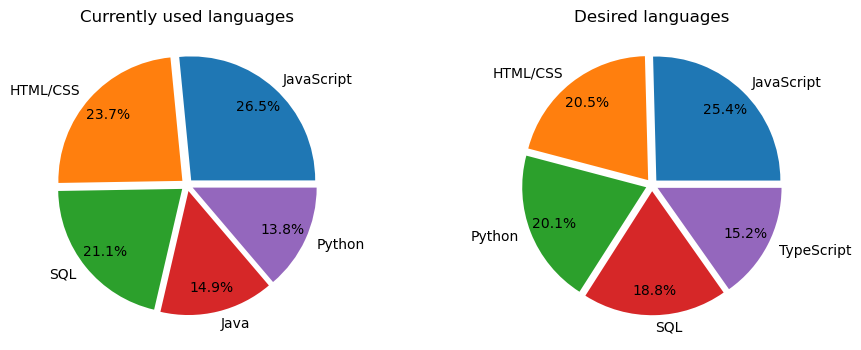

In [63]:
dataPlotLabel1 = [x[0] for x in df1.value_counts()[:5].index]
dataPlotCount1 = df1.value_counts()[:5].values 

dataPlotLabel2 = [x[0] for x in df2.value_counts()[:5].index]
dataPlotCount2 = df2.value_counts()[:5].values 

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)

# First pie chart
explode1 = [0.05] * len(dataPlotCount1)
axs[0].pie(dataPlotCount1, labels=dataPlotLabel1, autopct='%1.1f%%', pctdistance=0.8, explode = explode1)
axs[0].set_title("Currently used languages")

# Second pie chart
explode2 = [0.05] * len(dataPlotCount2)
axs[1].pie(dataPlotCount2, labels=dataPlotLabel2, autopct='%1.1f%%', pctdistance=0.8, explode = explode2)
axs[1].set_title("Desired languages")

plt.show()

### Comparing the current popularity of platforms among developers and their future demand

In [64]:
df1 = columnUniqueValuesCount(devData, "PlatformWorkedWith")
df2 = columnUniqueValuesCount(devData, "PlatformDesireNextYear")

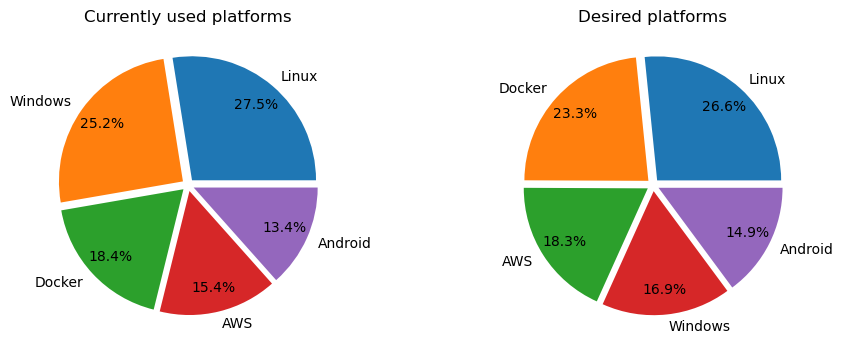

In [65]:
dataPlotLabel1 = [x[0] for x in df1.value_counts()[:5].index]
dataPlotCount1 = df1.value_counts()[:5].values 

dataPlotLabel2 = [x[0] for x in df2.value_counts()[:5].index]
dataPlotCount2 = df2.value_counts()[:5].values 

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)

# First pie chart
explode1 = [0.05] * len(dataPlotCount1)
axs[0].pie(dataPlotCount1, labels=dataPlotLabel1, autopct='%1.1f%%', pctdistance=0.8, explode = explode1)
axs[0].set_title("Currently used platforms")

# Second pie chart
explode2 = [0.05] * len(dataPlotCount2)
axs[1].pie(dataPlotCount2, labels=dataPlotLabel2, autopct='%1.1f%%', pctdistance=0.8, explode = explode2)
axs[1].set_title("Desired platforms")

plt.show()

### Comparing the current popularity of databases among developers and their future demand

In [66]:
df1 = columnUniqueValuesCount(devData, "DatabaseWorkedWith")
df2 = columnUniqueValuesCount(devData, "DatabaseDesireNextYear")

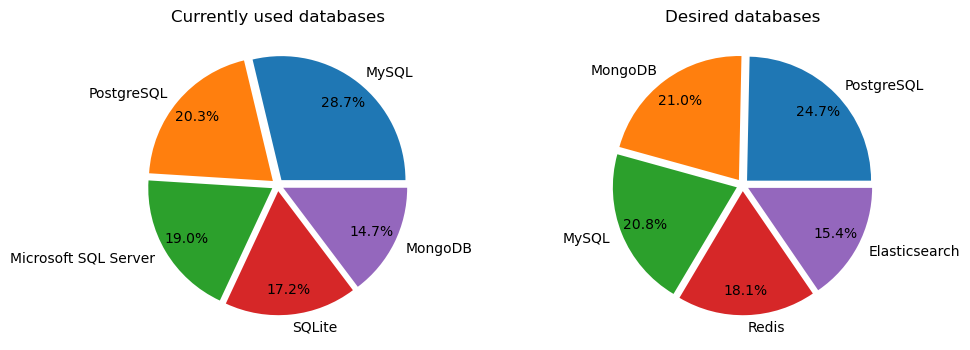

In [67]:
dataPlotLabel1 = [x[0] for x in df1.value_counts()[:5].index]
dataPlotCount1 = df1.value_counts()[:5].values 

dataPlotLabel2 = [x[0] for x in df2.value_counts()[:5].index]
dataPlotCount2 = df2.value_counts()[:5].values 

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)

# First pie chart
explode1 = [0.05] * len(dataPlotCount1)
axs[0].pie(dataPlotCount1, labels=dataPlotLabel1, autopct='%1.1f%%', pctdistance=0.8, explode = explode1)
axs[0].set_title("Currently used databases")

# Second pie chart
explode2 = [0.05] * len(dataPlotCount2)
axs[1].pie(dataPlotCount2, labels=dataPlotLabel2, autopct='%1.1f%%', pctdistance=0.8, explode = explode2)
axs[1].set_title("Desired databases")

plt.show()

### Preferred work location of Developers

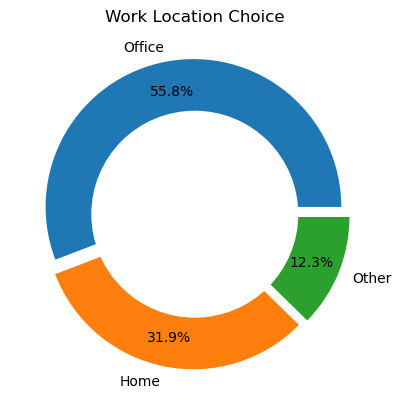

In [68]:
dataPlotCount = devData["WorkLoc"].value_counts().values
dataPlotLabel = devData["WorkLoc"].value_counts().index 

explode = (0.05, 0.05, 0.05)
plt.pie(dataPlotCount, labels=dataPlotLabel, autopct='%1.1f%%', pctdistance=0.8, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)
  
plt.title("Work Location Choice")
  
plt.show()